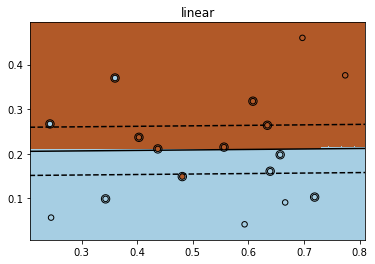

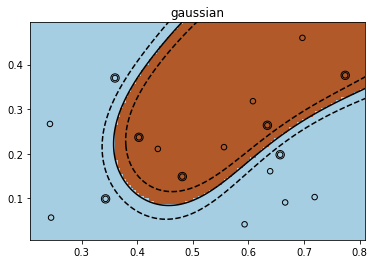

In [20]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

with open('watermelon_dataset.txt', 'r') as dataset:
    X=[]
    y=[]
    while True:
        lines = dataset.readline()
        if not lines:
            break
            pass
        ID, density, sugar_content, label = [float(i) for i in lines.split()]
        X.append([density, sugar_content])
        y.append(int(label))
        pass
    X = np.array(X)
    y = np.array(y)
    pass

from sklearn import svm

def svm_train(kernel='linear', C=1, label='label'):
    svc = svm.SVC(C=C, kernel=kernel, gamma=10)
    svc.fit(X, y)
    sv = svc.support_vectors_

    plt.figure()
    plt.clf()
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired, edgecolor='k', s=30)
    plt.scatter(sv[:, 0], sv[:, 1], s=70, facecolors='none', zorder=10, edgecolor='k')

    plt.axis('tight')
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    XX, YY = np.mgrid[x_min-0.2:x_max+0.2:200j, y_min-0.4:y_max+0.4:200j]
    Z = svc.decision_function(np.c_[XX.ravel(), YY.ravel()])

    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'], levels=[-.5, 0, .5])

    plt.title(label)
 
svm_train(kernel='linear', C=1000, label='linear')
plt.savefig('linear_result.jpg',dpi=1000, bbox_inches='tight')
svm_train(kernel='rbf', C=1000, label='gaussian')
plt.savefig('gaussian_result.jpg',dpi=1000, bbox_inches='tight')
    
plt.show()